Usando um mock data com os tipos de dados que estarão presentes no banco de dados da aplicação, utilizamos dois algoritmos de exemplo ao que será usado na aplicação, kmeans para separar os clientes e keras para prever a classsificação

In [1]:
# Importando os bibliotecas:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from keras.models import Sequential
from keras.layers import Dense

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import warnings
warnings.filterwarnings('ignore')

In [32]:
df = pd.read_csv('/content/MOCK_DATA.csv')

In [33]:
df

,nome,email,telefone,dtaNascimento,dtaCadastro,segmentoMercado,cep,logradouro,numero,complemento,cidade,estado,bairro,tipo,descricao,DtInteracao
0,Hilton,hneighbour0@nbcnews.com,63443858350,18/5/1959,22/7/2022,construcao,57594-641,Travessa dos Passarinhos,4988,Bloco D,Porto Alegre,PR,Barra da Tijuca,RESIDENCIAL,ciberseguranca,27/6/2023
1,Benedict,bsharple1@chron.com,2870597195,20/10/1991,20/12/2023,alimentos,90707-445,Rua A,28887,Bloco C,Manaus,MG,Copacabana,RESIDENCIAL,desenvolvimento de software,28/1/2024
2,Corene,cfrape2@hugedomains.com,93958586740,12/2/1973,27/4/2024,tecnologia,51301-597,Avenida Brasil,4008,Bloco A,Porto Alegre,SC,Barra da Tijuca,RESIDENCIAL,desenvolvimento de software,20/11/2020
3,Karissa,kwattam3@miibeian.gov.cn,2673715614,26/11/1991,14/5/2023,entretenimento,50568-804,Rua das Flores,96,Bloco A,Fortaleza,BA,Barra da Tijuca,RESIDENCIAL,cloud computing,2/8/2022
4,Beverlee,bcabel4@noaa.gov,10753221275,26/8/1987,10/12/2021,financeiro,75896-387,Rua A,329,Bloco E,Belo Horizonte,RS,Ipanema,COMERCIAL,blockchain,24/3/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Rivi,rodowgainern@kickstarter.com,3750390571,7/3/1987,17/4/2023,saude,30361-878,Rua das Flores,2274,Bloco A,Salvador,CE,Leblon,COMERCIAL,tecnologia wearable,23/9/2023
996,Auberon,abonnerro@gmpg.org,75275703063,28/12/1980,24/11/2021,alimentos,93256-808,Avenida Brasil,2582,Bloco D,Brasília,CE,Barra da Tijuca,RESIDENCIAL,big data,17/7/2023
997,Lenard,lcostonrp@geocities.jp,1531233801,6/12/1988,14/3/2023,entretenimento,39290-394,Rua do Sol,283,Bloco B,Curitiba,RJ,Ipanema,RESIDENCIAL,internet das coisas,24/12/2023
998,Gabi,gmachanrq@freewebs.com,95528205274,20/1/1980,24/12/2020,educacao,42383-592,Rua A,9,Bloco D,Curitiba,SC,Botafogo,RESIDENCIAL,internet das coisas,19/5/2023


In [34]:
df.columns

Index(['nome', 'email', 'telefone', 'dtaNascimento', 'dtaCadastro',
       'segmentoMercado', 'cep', 'logradouro', 'numero', 'complemento',
       'cidade', 'estado', 'bairro', 'tipo', 'descricao', 'DtInteracao'],
      dtype='object')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   nome             1000 non-null   object
 1   email            1000 non-null   object
 2   telefone         1000 non-null   int64 
 3   dtaNascimento    1000 non-null   object
 4   dtaCadastro      1000 non-null   object
 5   segmentoMercado  1000 non-null   object
 6   cep              1000 non-null   object
 7   logradouro       1000 non-null   object
 8   numero           1000 non-null   int64 
 9   complemento      896 non-null    object
 10  cidade           1000 non-null   object
 11  estado           1000 non-null   object
 12  bairro           1000 non-null   object
 13  tipo             1000 non-null   object
 14  descricao        1000 non-null   object
 15  DtInteracao      1000 non-null   object
dtypes: int64(2), object(14)
memory usage: 125.1+ KB


In [36]:
df = df.drop(['nome', 'email', 'telefone', 'cep', 'logradouro', 'numero', 'complemento', 'bairro'], axis=1)

In [37]:
# prompt: label enconder das coluinas object

le = LabelEncoder()

for column in df.columns:
  if df[column].dtype == object:
    df[column] = le.fit_transform(df[column])


df

,dtaNascimento,dtaCadastro,segmentoMercado,cidade,estado,tipo,descricao,DtInteracao
0,298,353,2,5,5,1,2,481
1,396,291,0,4,3,1,4,491
2,100,477,7,5,8,1,4,291
3,577,124,4,3,1,1,3,287
4,591,23,5,0,7,0,1,408
...,...,...,...,...,...,...,...,...
995,895,200,6,8,2,0,9,391
996,648,391,0,1,2,1,0,212
997,855,120,4,2,6,1,6,403
998,392,393,3,2,8,1,6,257


In [38]:
df.describe()

,dtaNascimento,dtaCadastro,segmentoMercado,cidade,estado,tipo,descricao,DtInteracao
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,483.790000,363.918000,4.540000,4.492000,4.546000,0.488000,4.451000,369.588000
std,280.409942,212.037339,2.837684,2.906266,2.882393,0.500106,2.870512,213.661034
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,241.750000,181.750000,2.000000,2.000000,2.000000,0.000000,2.000000,184.750000
50%,482.500000,362.000000,5.000000,4.000000,5.000000,0.000000,5.000000,370.500000
75%,726.250000,545.250000,7.000000,7.000000,7.000000,1.000000,7.000000,552.250000
max,970.000000,731.000000,9.000000,9.000000,9.000000,1.000000,9.000000,737.000000


In [39]:
df.isnull().sum()


,0
dtaNascimento,0
dtaCadastro,0
segmentoMercado,0
cidade,0
estado,0
tipo,0
descricao,0
DtInteracao,0


In [40]:
distorcoes = []
K = range(1,10)
for k in K:
    modelo01 = KMeans(n_clusters=k)
    modelo01.fit(df)
    distorcoes.append(modelo01.inertia_)

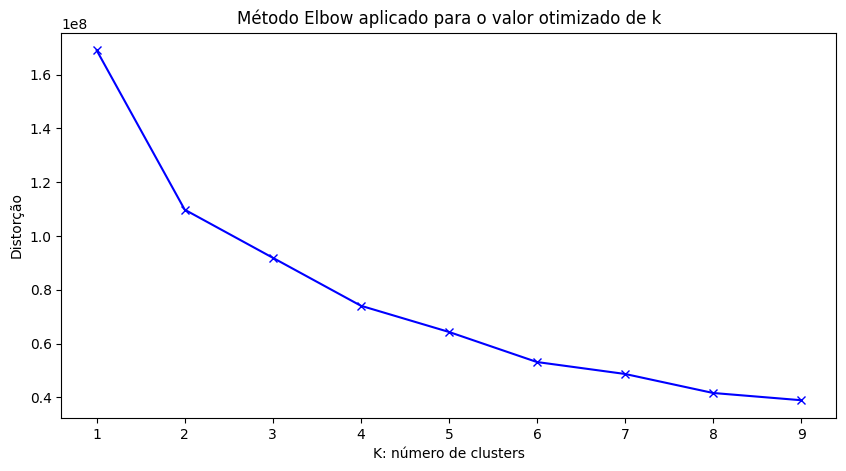

In [41]:
plt.figure(figsize=(10,5))
plt.plot(K, distorcoes, '-bx')

# Define os labels do eixos do gráfico:
plt.xlabel('K: número de clusters')
plt.ylabel('Distorção')

# Define um título para o gráfico:
plt.title('Método Elbow aplicado para o valor otimizado de k')

# Mostra o gráfico:
plt.show()

In [45]:
modelo_KMeans = KMeans(n_clusters=6)
modelo_KMeans.fit(df)

KMeans(n_clusters=6)

In [46]:
df['clusters'] = modelo_KMeans.predict(df)

In [47]:
silhouette = silhouette_score(df, df['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.2805


In [48]:
df.rename(columns={'clusters': 'Classificação_cliente'}, inplace=True)


In [49]:
df

,dtaNascimento,dtaCadastro,segmentoMercado,cidade,estado,tipo,descricao,DtInteracao,Classificação_cliente
0,298,353,2,5,5,1,2,481,5
1,396,291,0,4,3,1,4,491,5
2,100,477,7,5,8,1,4,291,1
3,577,124,4,3,1,1,3,287,3
4,591,23,5,0,7,0,1,408,3
...,...,...,...,...,...,...,...,...,...
995,895,200,6,8,2,0,9,391,3
996,648,391,0,1,2,1,0,212,2
997,855,120,4,2,6,1,6,403,3
998,392,393,3,2,8,1,6,257,1


In [50]:
df.corr().round(4)

,dtaNascimento,dtaCadastro,segmentoMercado,cidade,estado,tipo,descricao,DtInteracao,Classificação_cliente
dtaNascimento,1.0000,-0.0139,-0.0349,-0.0349,0.0058,0.0161,0.0010,0.0574,0.2137
dtaCadastro,-0.0139,1.0000,0.0029,-0.0082,0.0429,0.0529,-0.0171,0.0037,0.0953
segmentoMercado,-0.0349,0.0029,1.0000,-0.0264,-0.0382,-0.0392,0.0454,-0.0052,-0.0252
cidade,-0.0349,-0.0082,-0.0264,1.0000,-0.0315,0.0220,0.0039,-0.0456,-0.0338
estado,0.0058,0.0429,-0.0382,-0.0315,1.0000,0.0469,-0.0135,-0.0172,0.0098
tipo,0.0161,0.0529,-0.0392,0.0220,0.0469,1.0000,0.0216,-0.0001,-0.0064
descricao,0.0010,-0.0171,0.0454,0.0039,-0.0135,0.0216,1.0000,-0.0479,-0.0605
DtInteracao,0.0574,0.0037,-0.0052,-0.0456,-0.0172,-0.0001,-0.0479,1.0000,0.7222
Classificação_cliente,0.2137,0.0953,-0.0252,-0.0338,0.0098,-0.0064,-0.0605,0.7222,1.0000


<Axes: title={'center': 'Distribuição de Frequências'}, xlabel='Classificação_cliente', ylabel='Cliente'>

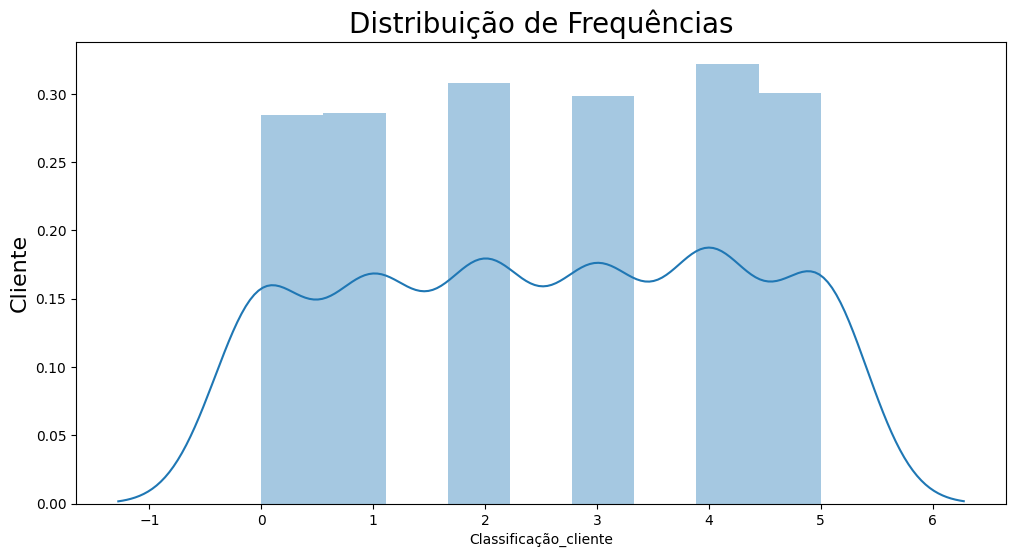

In [51]:
ax = sns.distplot(df['Classificação_cliente'])

ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuição de Frequências', fontsize=20)
ax.set_ylabel('Cliente', fontsize=16)

ax

In [52]:
X = df.iloc[:, 0:-1]
X

,dtaNascimento,dtaCadastro,segmentoMercado,cidade,estado,tipo,descricao,DtInteracao
0,298,353,2,5,5,1,2,481
1,396,291,0,4,3,1,4,491
2,100,477,7,5,8,1,4,291
3,577,124,4,3,1,1,3,287
4,591,23,5,0,7,0,1,408
...,...,...,...,...,...,...,...,...
995,895,200,6,8,2,0,9,391
996,648,391,0,1,2,1,0,212
997,855,120,4,2,6,1,6,403
998,392,393,3,2,8,1,6,257


In [53]:
y = df['Classificação_cliente']
y

,Classificação_cliente
0,5
1,5
2,1
3,3
4,3
...,...
995,3
996,2
997,3
998,1


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=27)

In [55]:
y_train_array = y_train.to_numpy().reshape(-1, 1)
y_test_array = y_test.to_numpy().reshape(-1, 1)

In [56]:
encoder = OneHotEncoder(categories='auto')
y_train_encoded = encoder.fit_transform(y_train_array).toarray()
y_test_encoded = encoder.transform(y_test_array).toarray()

In [60]:
model = Sequential()

model.add(Dense(10, input_shape=(8,), activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(6, activation='softmax'))



In [61]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [62]:
model.fit(X_train, y_train_encoded, epochs=100)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1813 - loss: 166.7535   
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1945 - loss: 98.7642  
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2298 - loss: 43.2479 
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2818 - loss: 27.6426 
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2894 - loss: 21.6769 
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3334 - loss: 16.4607 
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3305 - loss: 14.0191 
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3591 - loss: 10.0872
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3616 - loss: 7.8119 
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3145 - loss: 6.3436 
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.3330 - loss: 4.7723 
Epoch 12/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0

In [63]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f'Acurácia do modelo: {accuracy}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.6174  
Acurácia do modelo: 0.7900000214576721
